In [1]:
import math
from pathlib import Path

import numpy as np
from pandas import DataFrame

import utility
import data_loader
from evaluator import GoMapEvaluator

In [2]:
detections = data_loader.load_gomap_test_detections()
truths = data_loader.load_gomap_test_truths()

In [3]:
data = {}
for approach in utility.get_approaches():
    predictions = utility.get_predictions(
        detections,
        approach,
        utility.compute_cluster_centroid
    )
    evaluation = GoMapEvaluator(predictions, truths).evaluate()
    data[type(approach).__name__] = np.degrees(evaluation.errors['direction_error'])

<AxesSubplot:>

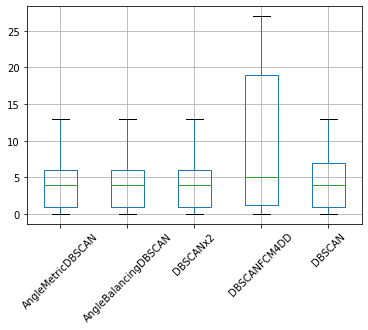

In [4]:
df = DataFrame.from_dict(data, orient='index').transpose()
df.boxplot(
    column=[
        'AngleMetricDBSCAN',
        'AngleBalancingDBSCAN',
        'DBSCANx2',
        'DBSCANFCM4DD',
        'DBSCAN'
    ], 
    rot=45, 
    showfliers=False
)

In [5]:
output = Path() / 'output'
output.mkdir(parents=True, exist_ok=True)
df.to_csv(output.joinpath('angle_errors.csv'))